In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
station = 'sj2'
neighborhood = '25'

In [3]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [4]:
vtec = df_series_vtec[station]
s4 = df_series_s4[station]

df = pd.DataFrame(index=s4.index)
df['vtec'] = vtec.values

vtec_neighborhood = df_series_vtec[neighborhood]
s4_neighborhood = df_series_s4[neighborhood] 

In [5]:
# to s4 data
value_min_s4 = s4.min()
value_max_s4 = s4.max()

print('Valor mínimo de s4:', value_min_s4)
print('Valor máximo de s4:', value_max_s4)

scale_s4 = Scale(value_min_s4, value_max_s4)
s4_scale = pd.Series(scale_s4(s4.values.ravel()), index=s4.index)

Valor mínimo de s4: 0.11990822024186153
Valor máximo de s4: 0.7698330806187225


In [6]:
# to vtec data
value_min_vtec = vtec.min()
value_max_vtec = vtec.max()

print('Valor mínimo de vtec:', value_min_vtec)
print('Valor máximo de vtec:', value_max_vtec)

scale_vtec = Scale(value_min_vtec, value_max_vtec)
vtec_scale = pd.Series(scale_vtec(vtec.values.ravel()), index=vtec.index)

Valor mínimo de vtec: -9.345570161607602
Valor máximo de vtec: 102.68906554876085


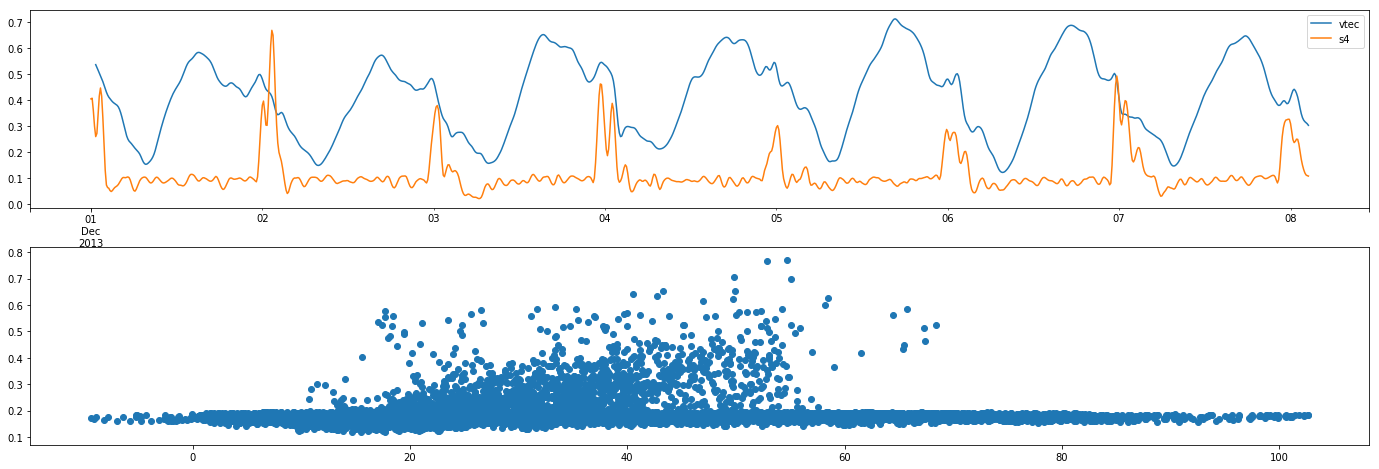

In [27]:
fig, ax = plt.subplots(2, 1)
figsize=(24, 8)
vtec_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='vtec')
s4_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='s4')
ax[0].legend(loc="upper right")

ax[1].scatter(vtec.values, s4.values)

# Derivada Temporal do VTEC

In [9]:
# calculate first order derivative in time for the tec data
# and then, save series 

vtec_lag_1 = vtec.shift(1)
vtec_dt = vtec - vtec_lag_1
df['vtec_dt'] = vtec_dt.values

# to vtec_dt data
value_min_vtec_dt = vtec_dt.min()
value_max_vtec_dt = vtec_dt.max()

print('Valor mínimo de vtec:', value_min_vtec_dt)
print('Valor máximo de vtec:', value_max_vtec_dt)

scale_vtec_dt = Scale(value_min_vtec_dt, value_max_vtec_dt)
vtec_dt_scale = pd.Series(scale_vtec_dt(vtec_dt.values.ravel()), index=vtec_dt.index)

Valor mínimo de vtec: -8.541672602753884
Valor máximo de vtec: 8.451275140526803


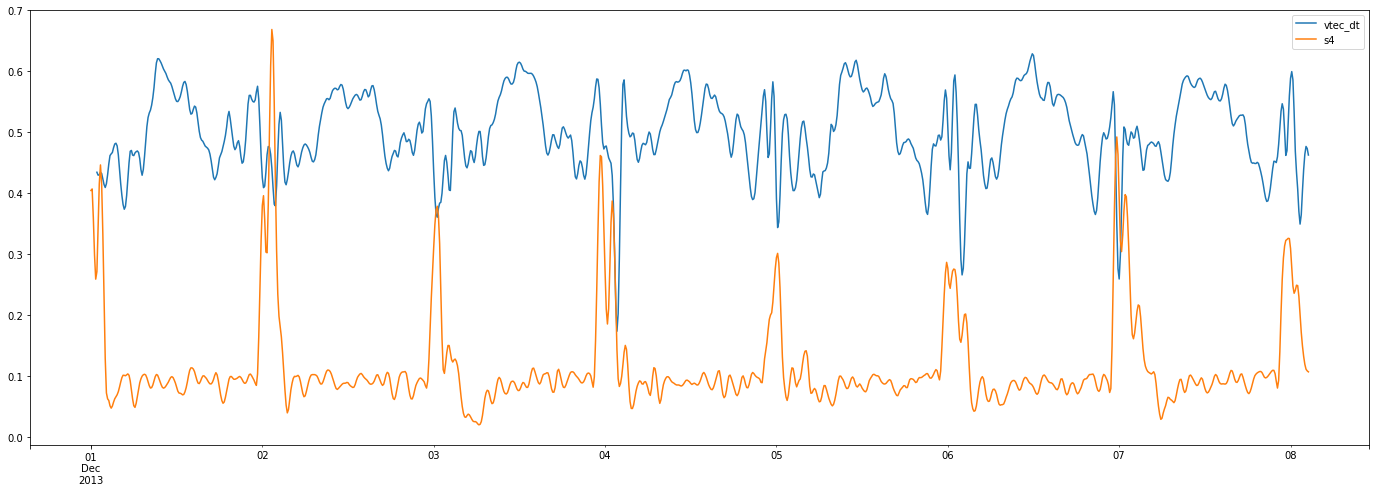

In [10]:
fig, ax = plt.subplots(2, 1)
figsize=(24, 8)
vtec_dt_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='vtec_dt')
s4_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='s4')
ax[0].legend(loc="upper right")

ax[1].scatter(vtec_dt.values, s4.values)

# Derivada Temporal de Segunda Ordem do vtec

In [12]:
# calculate second order derivative in time for the tec data
# and then, save series 

vtec_lag_1 = vtec.shift(1)
vtec_lag_2 = vtec.shift(2)
vtec_dt2 = vtec - 2*vtec_lag_1 + vtec_lag_2

df['vtec_dt2'] = vtec_dt2.values

In [13]:
# to vtec_dt data
value_min_vtec_dt2 = vtec_dt2.min()
value_max_vtec_dt2 = vtec_dt2.max()

print('Valor mínimo de vtec:', value_min_vtec_dt2)
print('Valor máximo de vtec:', value_max_vtec_dt2)

scale_vtec_dt2 = Scale(value_min_vtec_dt2, value_max_vtec_dt2)
vtec_dt2_scale = pd.Series(scale_vtec_dt2(vtec_dt2.values.ravel()), index=vtec_dt2.index)

Valor mínimo de vtec: -5.644975420886382
Valor máximo de vtec: 5.027487793830787


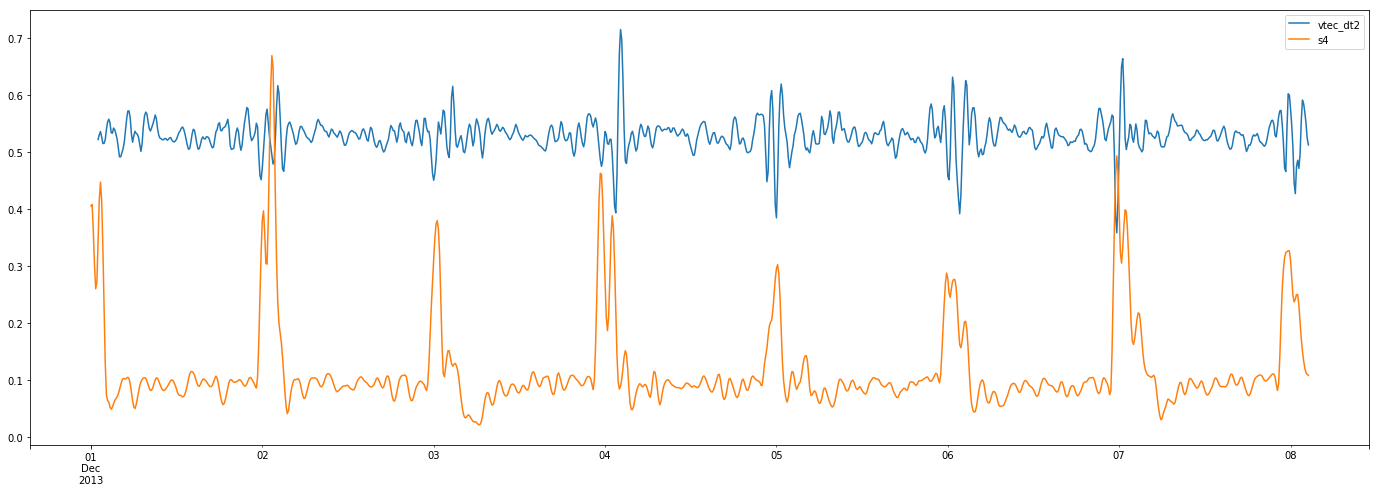

In [14]:
fig, ax = plt.subplots(2, 1)
figsize=(24, 8)
vtec_dt2_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='vtec_dt2')
s4_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='s4')
ax[0].legend(loc="upper right")

ax[1].scatter(vtec_dt2.values, s4.values)

# Derivada direcional do VTEC (gradiente) em relação à Pirassununga

In [16]:
gvtec = vtec - vtec_neighborhood
df['gvtec1'] = gvtec.values

# to gvtec data
value_min_gvtec = gvtec.min()
value_max_gvtec = gvtec.max()

print('Valor mínimo de gvtec:', value_min_gvtec)
print('Valor máximo de gvtec:', value_max_gvtec)

scale_gvtec = Scale(value_min_gvtec, value_max_gvtec)
gvtec_scale = pd.Series(scale_gvtec(gvtec.values.ravel()), index=gvtec.index)

Valor mínimo de gvtec: -19.018827802348035
Valor máximo de gvtec: 8.182026361709774


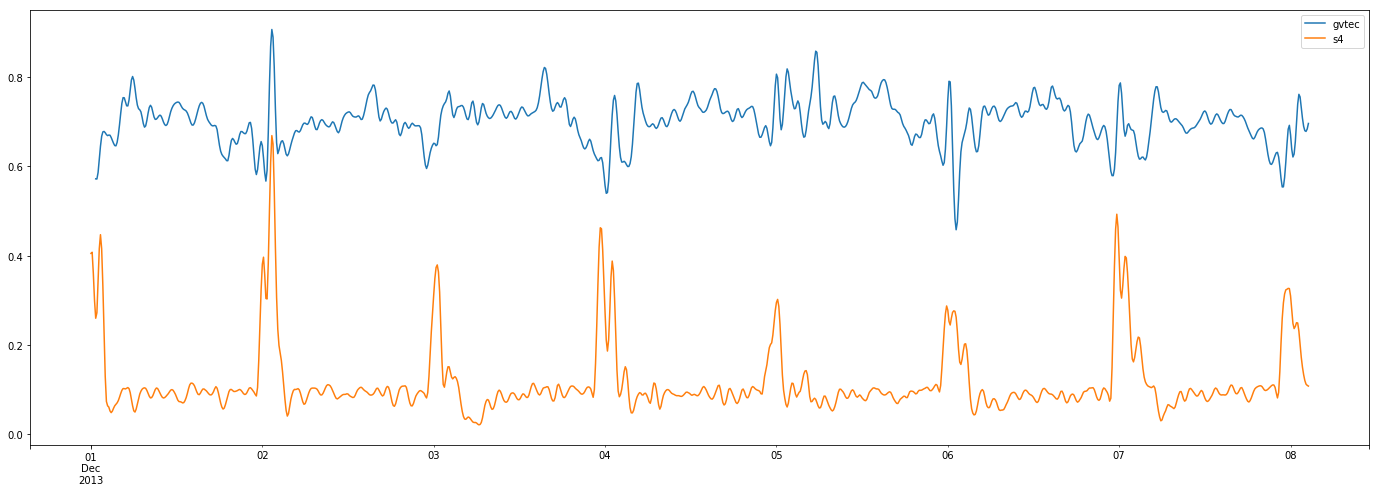

In [17]:
fig, ax = plt.subplots(2, 1)
figsize=(24, 8)
gvtec_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='gvtec')
s4_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='s4')
ax[0].legend(loc="upper right")

ax[1].scatter(gvtec.values, s4.values)

In [19]:
# calculate first order derivative in time for the gtec data
# and then, save series 

gvtec_lag_1 = gvtec.shift(1)
gvtec_dt = gvtec - gvtec_lag_1
df['gvtec_dt'] = gvtec_dt.values

# to vtec_dt data
value_min_gvtec_dt = gvtec_dt.min()
value_max_gvtec_dt = gvtec_dt.max()

print('Valor mínimo de gvtec:', value_min_gvtec_dt)
print('Valor máximo de gvtec:', value_max_gvtec_dt)

scale_gvtec_dt = Scale(value_min_gvtec_dt, value_max_gvtec_dt)
gvtec_dt_scale = pd.Series(scale_vtec_dt(gvtec_dt.values.ravel()), index=gvtec_dt.index)

Valor mínimo de gvtec: -3.8102440423554427
Valor máximo de gvtec: 7.153581022703904


# Derivada direcional do VTEC (gradiente) em relação à Brasília

In [20]:
neighborhood = 'bsa'
vtec_neighborhood = df_series_vtec[neighborhood]
s4_neighborhood = df_series_s4[neighborhood] 

gvtec = vtec - vtec_neighborhood
df['gvtec2'] = gvtec.values

# to gvtec data
value_min_gvtec = gvtec.min()
value_max_gvtec = gvtec.max()

print('Valor mínimo de gvtec:', value_min_gvtec)
print('Valor máximo de gvtec:', value_max_gvtec)

scale_gvtec = Scale(value_min_gvtec, value_max_gvtec)
gvtec_scale = pd.Series(scale_gvtec(gvtec.values.ravel()), index=gvtec.index)


Valor mínimo de gvtec: -41.50542148604446
Valor máximo de gvtec: 40.43210393218053


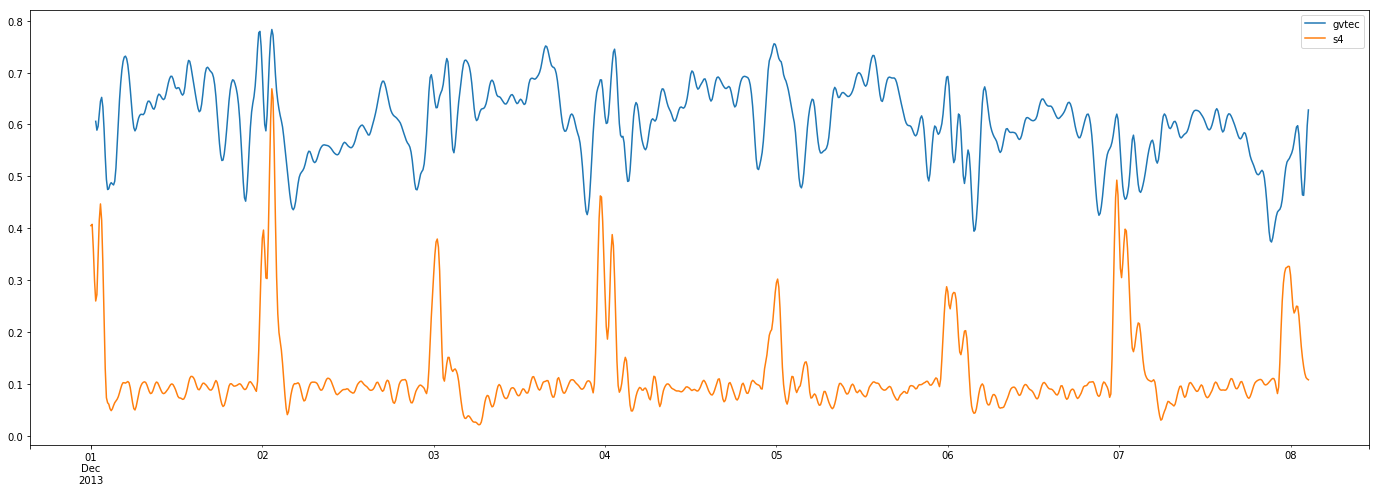

In [21]:
fig, ax = plt.subplots(2, 1)
figsize=(24, 8)
gvtec_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='gvtec')
s4_scale[0:1024].plot(figsize=figsize, ax=ax[0], label='s4')
ax[0].legend(loc="upper right")

ax[1].

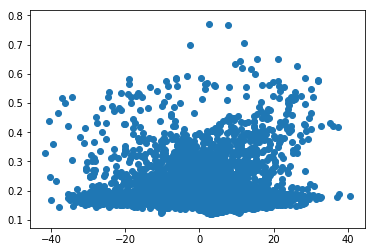

In [22]:
plt.scatter(gvtec.values, s4.values)

In [23]:
df['s4'] = s4.values
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec_dt,gvtec2,s4
2013-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.383016
2013-12-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,0.384627
2013-12-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,0.353813
2013-12-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,0.314523
2013-12-01 00:40:00,50.765356,NaN,NaN,-3.465988,NaN,8.143015,0.288548


In [24]:
df = df.dropna()
df.to_pickle('./data/sj2_analise.pkl')